# Simplilearn's Python Course End Project

# App Rating Preduction

# Author - Manoj Patil 

# Objective:
    
 Make a model to predict the app rating, with other information about the app provided.

# Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.







# Domain:
    General

# Analysis to be done: 

The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

# Content:
    
    Dataset: Google Play Store data (“googleplaystore.csv”)

# Fields in the data –


App: Application name

Category: Category to which the app belongs 

Rating: Overall user rating of the app

Reviews: Number of user reviews for the app

Size: Size of the app

Installs: Number of user downloads/installs for the app

Type: Paid or Free

Price: Price of the app

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store

Current Ver: Current version of the app available on Play Store

Android Ver: Minimum required Android version

# Steps to perform:
    

Load the data file using pandas. 

Check for null values in the data. Get the number of null values for each column.

Drop records with nulls in any of the columns. 

Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

5. Sanity checks:

Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

For free apps (type = “Free”), the price should not be >0. Drop any such rows.

5. Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

 

6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

For each of the plots above, note down your observation.

8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

10. Separate the dataframes into X_train, y_train, X_test, and y_test.

11 . Model building

Use linear regression as the technique

Report the R2 on the train set

12. Make predictions on test set and report R2.

# Importing Required Libraries

In [1]:
import pandas as pd # Data Handling & Data Cleaning 

import numpy as np # Numeric calculation

import matplotlib.pyplot as plt # Data Visualization

import seaborn as sns # Data Visualization

import warnings
warnings.filterwarnings('ignore')



# 1) Loading data set using pandas

In [2]:
data=pd.read_csv('googleplaystore.csv') # loaded data set using pandas

In [3]:
data.head() # shows top 5 rows 

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.tail() # bottom 5 rows 

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10813,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10814,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10815,10838,Parkinson Exercices FR,MEDICAL,4.2,3,9500,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10816,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10817,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
data.info() # To know null values and its data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10818 entries, 0 to 10817
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10818 non-null  int64  
 1   App             10818 non-null  object 
 2   Category        10818 non-null  object 
 3   Rating          10818 non-null  float64
 4   Reviews         10818 non-null  int64  
 5   Size            10818 non-null  int64  
 6   Installs        10818 non-null  int64  
 7   Type            10818 non-null  object 
 8   Price           10818 non-null  int64  
 9   Content Rating  10818 non-null  object 
 10  Genres          10818 non-null  object 
 11  Last Updated    10818 non-null  object 
 12  Current Ver     10818 non-null  object 
 13  Android Ver     10818 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.2+ MB


In [6]:
data.describe() # provides summary statistics of a given DataFrame

,Unnamed: 0,Rating,Reviews,Size,Installs,Price
count,10818.000000,10818.000000,1.081800e+04,10818.000000,1.081800e+04,10818.000000
mean,5417.800148,4.192439,4.450529e+05,18165.862082,1.549564e+07,0.963394
std,3130.132998,0.478876,2.930668e+06,22179.338748,8.511295e+07,15.913035
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2707.250000,4.100000,3.800000e+01,2600.000000,5.000000e+03,0.000000
50%,5415.500000,4.200000,2.107500e+03,9200.000000,1.000000e+05,0.000000
75%,8129.750000,4.500000,5.507700e+04,26000.000000,5.000000e+06,0.000000
max,10840.000000,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


# 2) Check for null values in the data. Get the number of null values for each column.

In [7]:
data.isna().sum() # To check null values in each column


Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
data.columns # To get only no of columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

# 3) Drop records with nulls in any of the columns. 

In [9]:
data.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
data.Rating=data.Rating.fillna(data.Rating.mean(), axis=0) #as the records were huge so i replaced the Nas with the mean value


In [11]:
data.loc[data.Rating.isnull()]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
data.Rating.isnull().any()

False

# 4) Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 


1) Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

In [13]:
data.Size.head(10)

0    19000
1    14000
2     8700
3    25000
4     2800
5     5600
6    19000
7    29000
8    33000
9     3100
Name: Size, dtype: int64

In [14]:
data.Size.tail(10)

10808     9800
10809      582
10810      619
10811     2600
10812     9600
10813    53000
10814     3600
10815     9500
10816        0
10817    19000
Name: Size, dtype: int64

In [15]:
data.Size=data.Size.astype(float)

In [16]:
data.Size.head(6)

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
5     5600.0
Name: Size, dtype: float64

In [17]:
data.Size=data.Size.replace(',','')

In [18]:
data.Size=data.Size.astype(int)

# B) Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [19]:
data.Reviews.dtype

dtype('int64')

In [20]:
data.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

In [21]:
data.loc[data.Reviews=='3.0M']

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [22]:
data.Reviews=data.Reviews.astype(int)

# C) Installs field is currently stored as string and has values like 1,000,000+. 

In [23]:
data.Installs=data.Installs.replace('+','')
data.Installs=data.Installs.replace(',','')

In [24]:
data.Installs=data.Installs.astype(int)

In [25]:
data.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10813        5000
10814         100
10815        1000
10816        1000
10817    10000000
Name: Installs, Length: 10818, dtype: int32

# D)Removing dollar sign from price

In [26]:
data.Price.head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: int64

In [27]:
str(data.Price).isnumeric()

False

In [28]:
data.Price=data.Price.replace('$','')
data.Price=data.Price.replace('Everyone','0')

In [29]:
data.Price=data.Price.astype(float)

In [30]:
data.Price.mean()

0.9633943427620633

In [31]:
data.Price=data.Price.astype(int)

# Sanity checks:
    
    Average rating should be between 1 and 5 as only these values are allowed on the play store.
    Drop the rows that have a value outside this range.

In [32]:
data.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [33]:
data.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [34]:
data.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [35]:
data.Rating.isnull().any()

False

In [36]:
data.Rating=round(data.Rating.astype(float),1)

# Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [37]:
subset=data.loc[(data.Reviews>data.Installs)].index
subset

Int64Index([], dtype='int64')

In [38]:
data=data.drop(index=subset)

In [39]:
# mydata[(mydata.Reviews > mydata.Installs)==True]
# for checking if any reviews columns which are greater than installs
(data.Reviews > data.Installs).any()

False

In [40]:
data.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10813        38
10814         4
10815         3
10816       114
10817    398307
Name: Reviews, Length: 10818, dtype: int32

In [41]:
data.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10813        5000
10814         100
10815        1000
10816        1000
10817    10000000
Name: Installs, Length: 10818, dtype: int32

In [42]:
(data.Reviews > data.Installs).any()

False

# For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [43]:
data.Type.value_counts()

Free    10027
Paid      791
Name: Type, dtype: int64

In [44]:
subset_type= data.loc[(data.Type=='Free') & (data.Price>0)].index
subset

Int64Index([], dtype='int64')

In [45]:
data.Type

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10813    Free
10814    Free
10815    Free
10816    Free
10817    Free
Name: Type, Length: 10818, dtype: object

# 6. Performing univariate analysis:

# Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [47]:
data.Price

0        0
1        0
2        0
3        0
4        0
        ..
10813    0
10814    0
10815    0
10816    0
10817    0
Name: Price, Length: 10818, dtype: int32

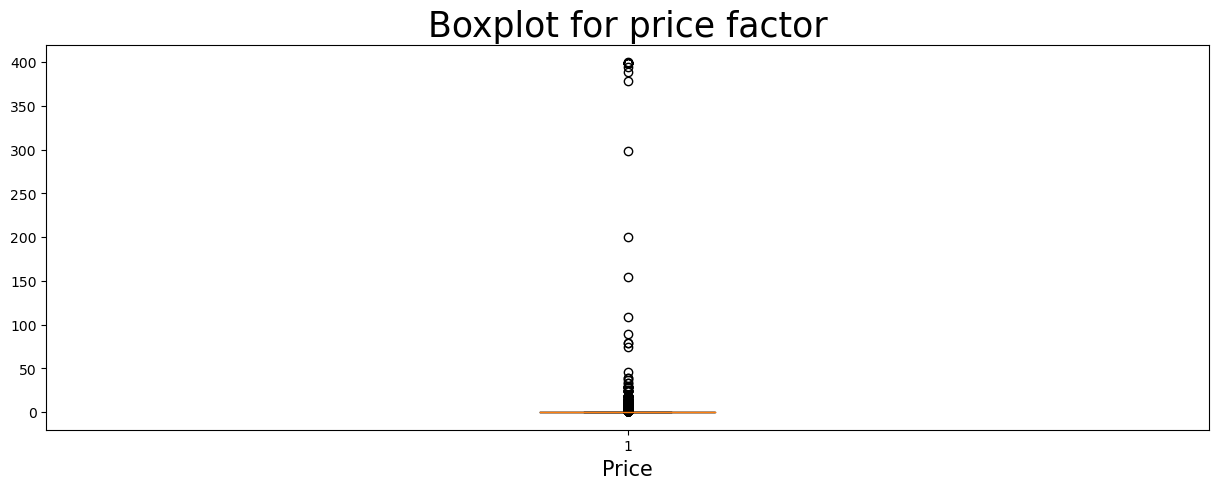

In [48]:
plt.figure(figsize=(15,5))
plt.boxplot(data.Price, vert=True)

plt.xlabel('Price', size=15)
plt.title('Boxplot for price factor', size=25)
plt.show()

<AxesSubplot:xlabel='Price'>

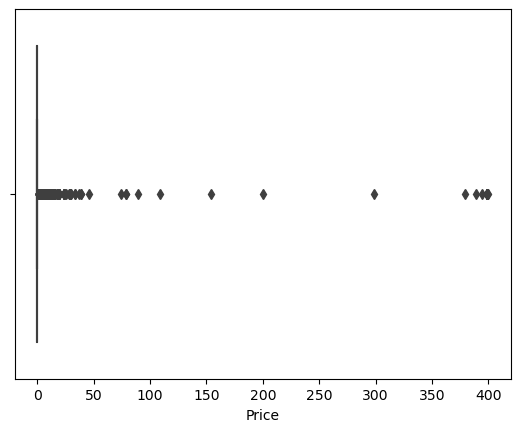

In [49]:
sns.boxplot(data.Price, data=data)

# Boxplot for Reviews

In [50]:
data.Reviews.mean()

445052.89388056943

In [51]:
data.Reviews.head(15)

0        159
1        967
2      87510
3     215644
4        967
5        167
6        178
7      36815
8      13791
9        121
10     13880
11      8788
12     44829
13      4326
14      1518
Name: Reviews, dtype: int32

In [52]:
data.Reviews=data.Reviews.astype(int)

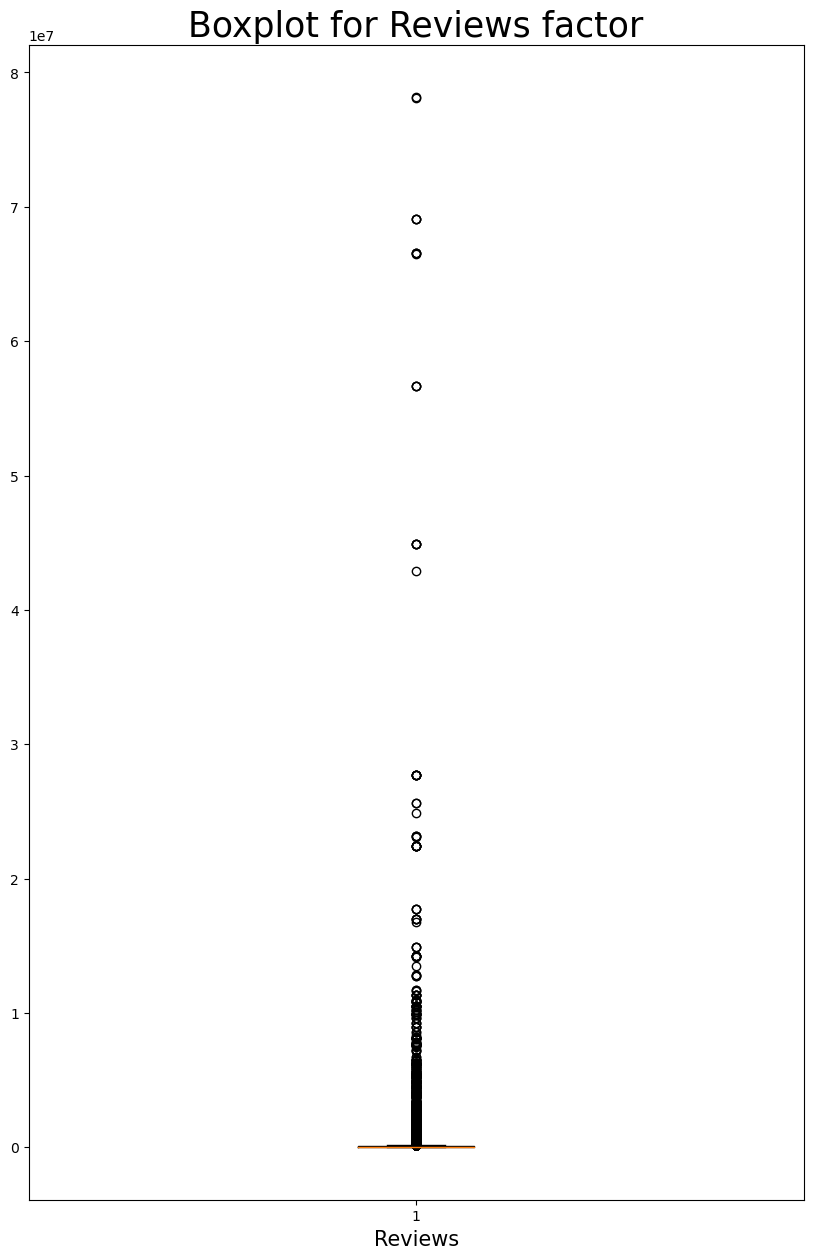

In [53]:
plt.figure(figsize=(10,15))
plt.boxplot(data.Reviews)
plt.xlabel('Reviews', size=15)
plt.title('Boxplot for Reviews factor', size=25)
plt.show()

Are there any apps with very high number of reviews? Do the values seem right?

# Histogram for Rating

Text(0.5, 1.0, 'Histogram for Ratings factor')

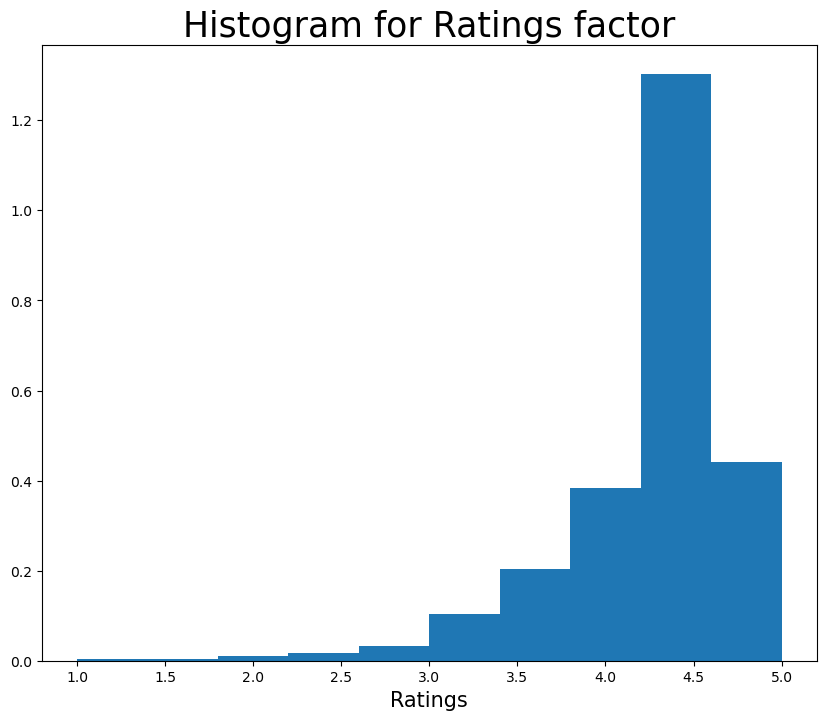

In [54]:
plt.figure(figsize=(10,8))
plt.hist(data.Rating, bins=10, density= True)
plt.xlabel('Ratings', size=15)
plt.title('Histogram for Ratings factor', size=25)

#How are the ratings distributed? Is it more toward higher ratings?

# box plot for ratings

Text(0.5, 1.0, 'Boxplot for Ratings factor')

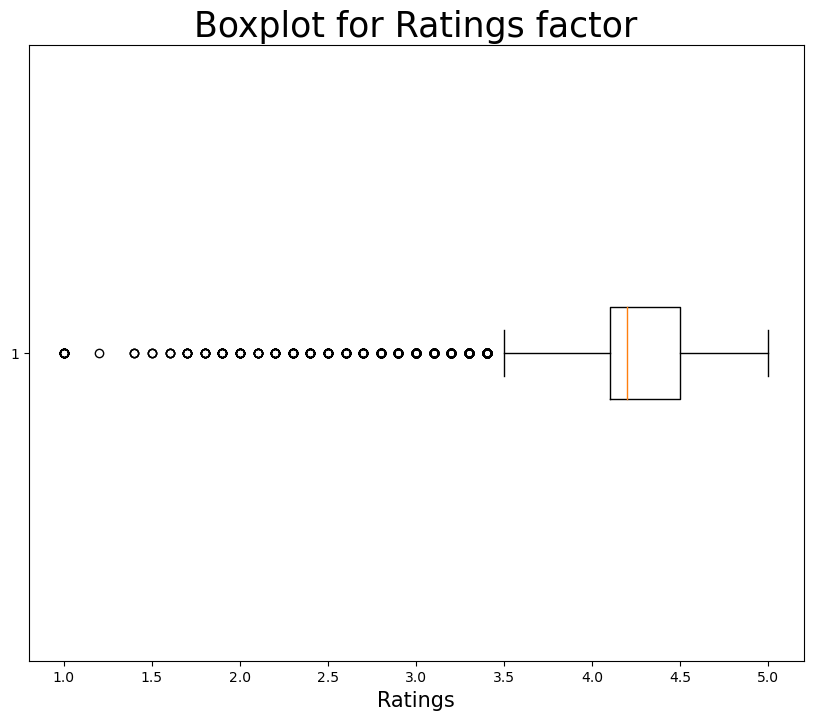

In [55]:
plt.figure(figsize=(10,8))
plt.boxplot(data.Rating, vert=False)
plt.xlabel('Ratings', size=15)
plt.title('Boxplot for Ratings factor', size=25)

# Histogram for Size

Text(0.5, 1.0, 'Histogram for size factor')

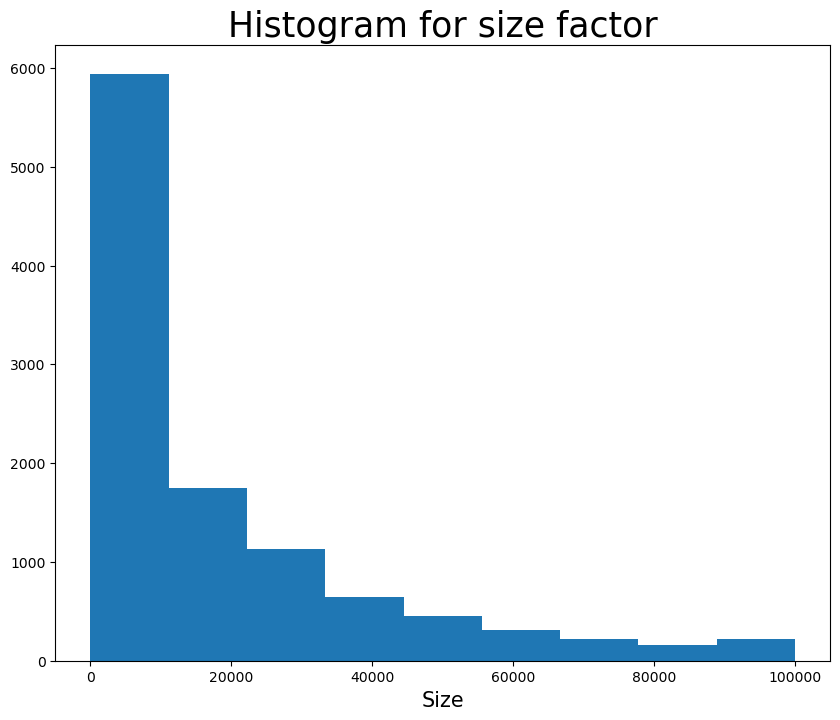

In [56]:
plt.figure(figsize=(10,8))
plt.hist(data.Size, bins=9)
plt.xlabel('Size', size=15)
plt.title('Histogram for size factor', size=25)

# box plot for size

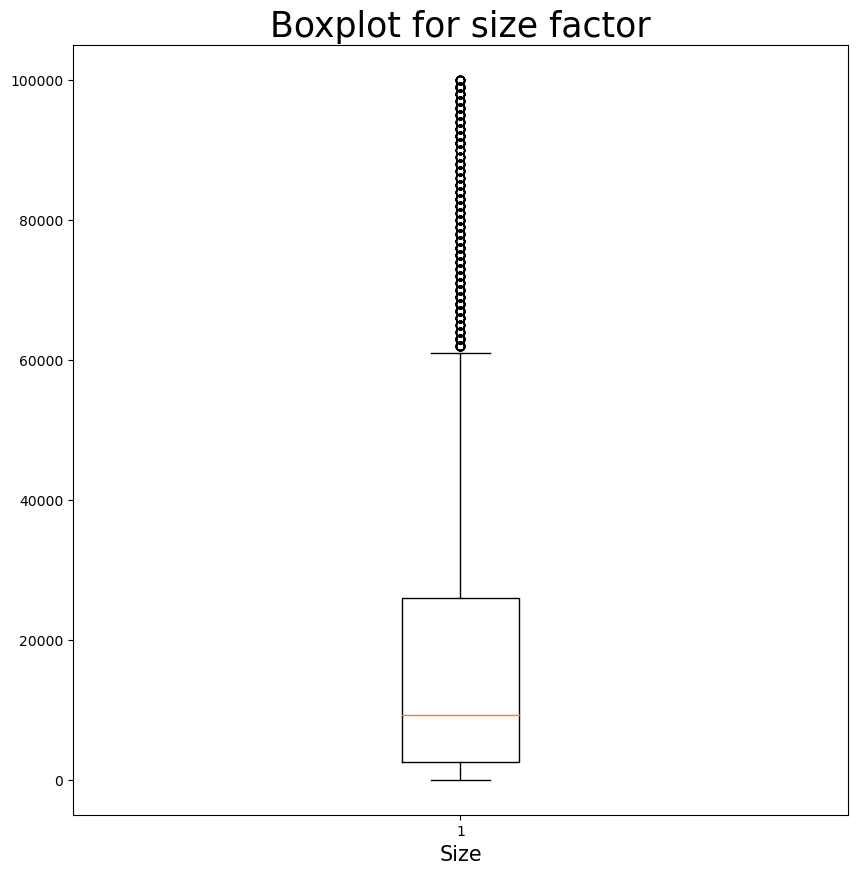

In [57]:
plt.figure(figsize=(10,10))
plt.boxplot(data.Size)
plt.xlabel('Size', size=15)
plt.title('Boxplot for size factor', size=25)
plt.show()

Note down your observations for the plots made above. Which of these seem to have outliers

# 7. Outlier treatment:

# Price: From the box plot, it seems like there are some apps with very high price. A price of 200dollars for an application on the Play Store is very high and suspicious!

In [58]:
data.Price.value_counts() # to check the frequency of customers who pays for more priced apps

0      10169
2        163
1        133
4         88
3         79
5         37
9         23
6         18
399       12
14        12
7          9
19         8
29         7
24         7
8          7
12         5
11         5
10         5
16         3
15         2
33         2
79         2
39         2
17         2
13         2
46         1
30         1
89         1
200        1
28         1
154        1
109        1
74         1
389        1
18         1
37         1
379        1
299        1
400        1
25         1
394        1
Name: Price, dtype: int64

In [59]:
price_outlier=data.Price

In [60]:
price_outlier=data.Price.drop(data.Price[(data.Price>105)].index, axis=0)

In [61]:
price_outlier.value_counts()

0     10169
2       163
1       133
4        88
3        79
5        37
9        23
6        18
14       12
7         9
19        8
8         7
24        7
29        7
12        5
11        5
10        5
16        3
15        2
33        2
39        2
79        2
17        2
13        2
46        1
89        1
28        1
25        1
18        1
37        1
74        1
30        1
Name: Price, dtype: int64

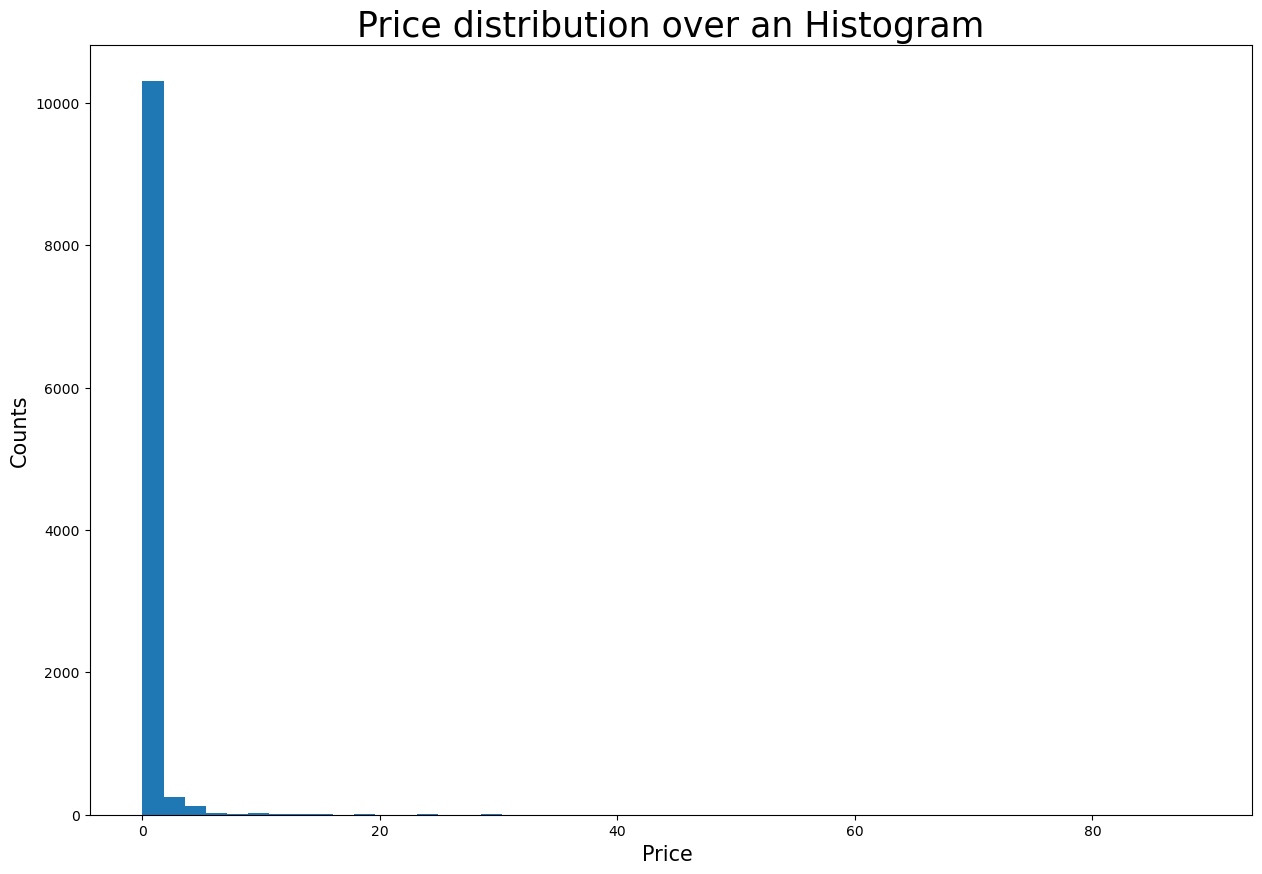

In [62]:
# we will check the price distribution via Histogram

plt.figure(figsize=(15,10))
plt.hist(price_outlier, bins=50)
plt.ylabel('Counts', size=15)
plt.xlabel('Price ', size=15)
plt.title('Price distribution over an Histogram', size=25)
plt.show()

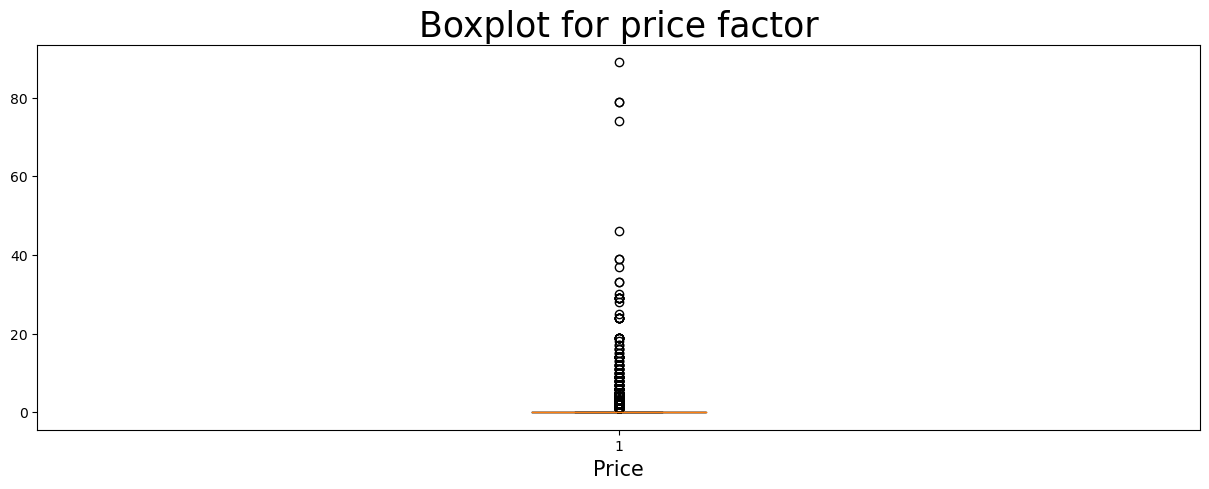

In [63]:
plt.figure(figsize=(15,5))
plt.boxplot(price_outlier, vert=True)

plt.xlabel('Price', size=15)
plt.title('Boxplot for price factor', size=25)
plt.show()

# Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews

In [64]:
reviews_outlier= data.Reviews

In [65]:
price_outlier=data.Price.drop(data.Price[(data.Price>105)].index, axis=0)

In [66]:
reviews_outlier=data.Reviews.drop(data.Reviews[(data.Reviews>2000000)].index, axis=0)

(array([9169.,  482.,  241.,  119.,  102.,   87.,   64.,   56.,   18.,
          27.]),
 array([      0. ,  198606.8,  397213.6,  595820.4,  794427.2,  993034. ,
        1191640.8, 1390247.6, 1588854.4, 1787461.2, 1986068. ]),
 <BarContainer object of 10 artists>)

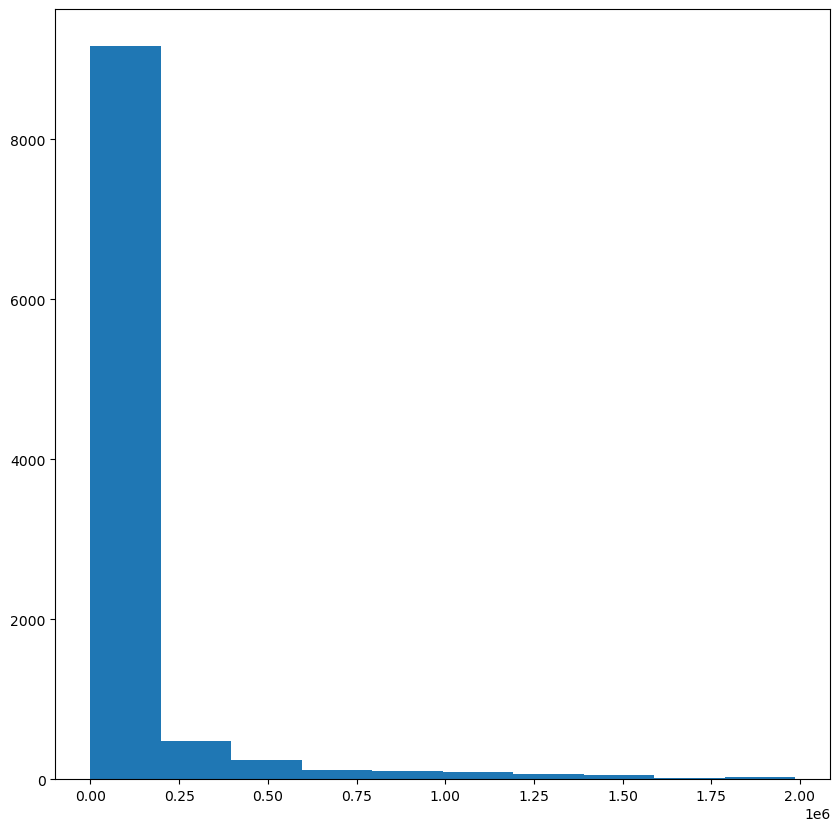

In [67]:
plt.figure(figsize=(10,10))
plt.hist(reviews_outlier, bins=10)

In [68]:
reviews_outlier[(reviews_outlier>2000000)].any()

False

# Installs: There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis

In [69]:
quantile=[.10, .25, .50, .70, .90, .95, .99]
for i in quantile:
    percentile=int(data.Installs.quantile(q=i))
    print('The quantile for',i,':',percentile)

The quantile for 0.1 : 100
The quantile for 0.25 : 5000
The quantile for 0.5 : 100000
The quantile for 0.7 : 1000000
The quantile for 0.9 : 10000000
The quantile for 0.95 : 50000000
The quantile for 0.99 : 500000000


# 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features


# 3 Make scatter plot/joinplot for Rating vs. Price

<AxesSubplot:xlabel='Rating', ylabel='Price'>

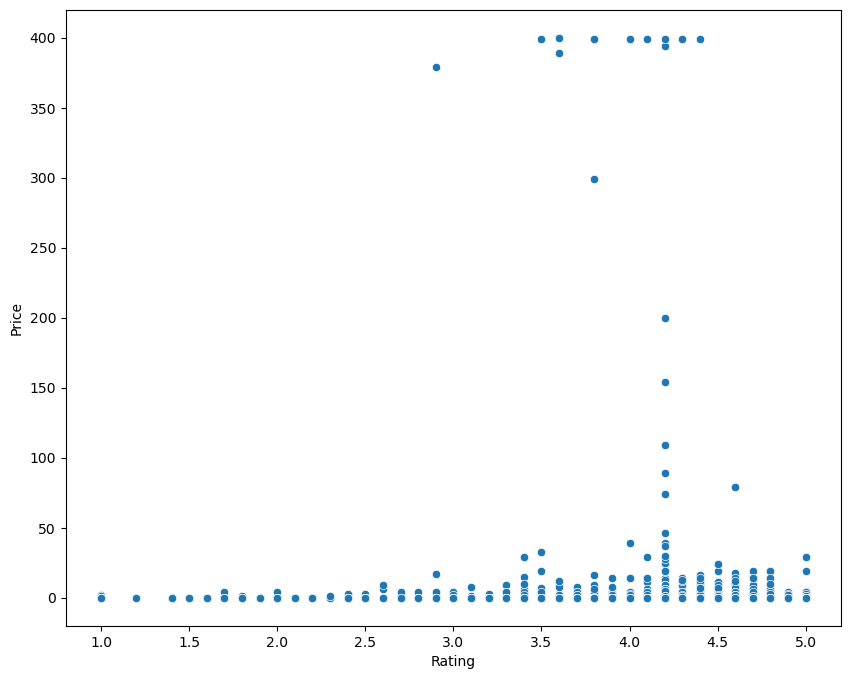

In [70]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data.Rating, y=data.Price, data=data)

In [71]:
data.Price.corr(data.Rating)

-0.0207109382448764

What pattern do you observe? Does rating increase with price?

# Make scatter plot/joinplot for Rating vs. Size

<AxesSubplot:xlabel='Rating', ylabel='Size'>

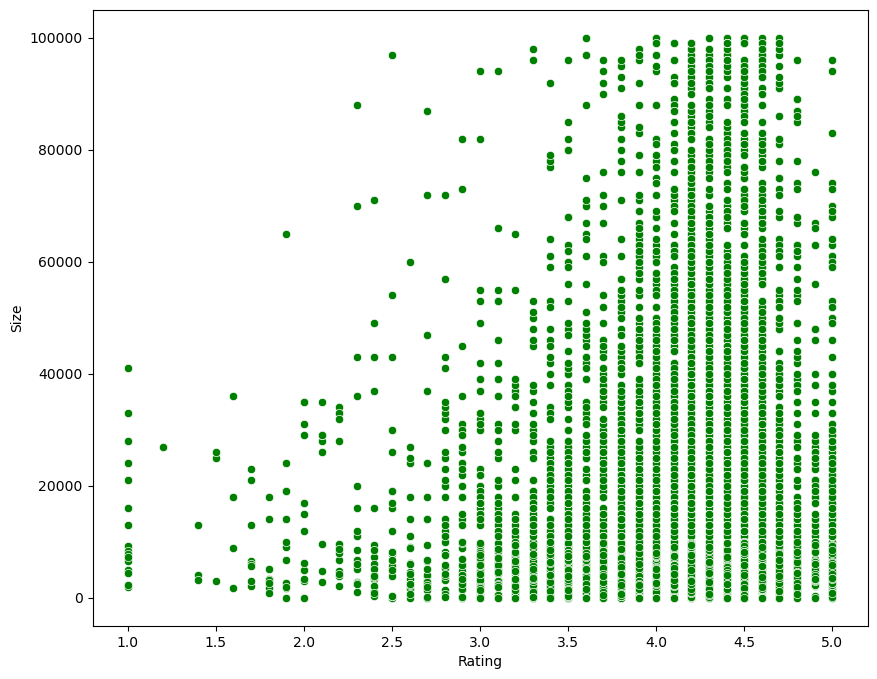

In [72]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data.Rating, y='Size', data=data, color='green')

In [73]:
data.Size.corr(data.Rating)

0.04385566810962977

Are heavier apps rated better?

# Make boxplot for Rating vs. Content Rating

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

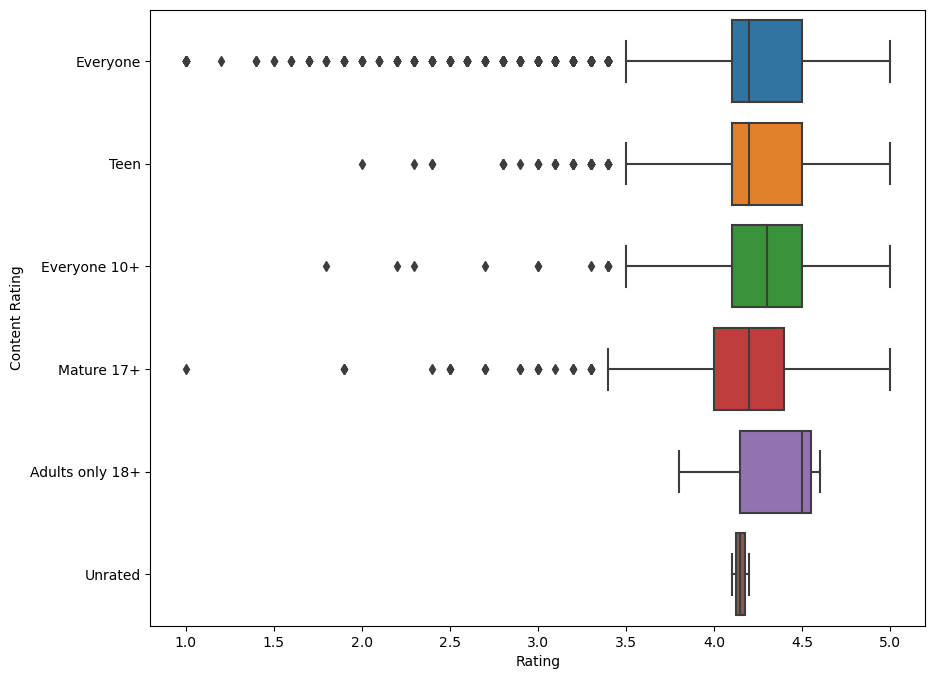

In [74]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Rating', y='Content Rating',data=data)

# Is there any difference in the ratings? Are some types liked better?

# Make boxplot for Ratings vs. Category

In [75]:
data.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [76]:
app_category=data.Category.unique()
app_category

dictionary={}
for i in range(0,len(app_category)):
    dictionary[app_category[i]]=i
    
dictionary
# a=data.Category
# a
# a=a.map(dictionary)
# a.tail()

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FINANCE': 11,
 'FOOD_AND_DRINK': 12,
 'HEALTH_AND_FITNESS': 13,
 'HOUSE_AND_HOME': 14,
 'LIBRARIES_AND_DEMO': 15,
 'LIFESTYLE': 16,
 'GAME': 17,
 'FAMILY': 18,
 'MEDICAL': 19,
 'SOCIAL': 20,
 'SHOPPING': 21,
 'PHOTOGRAPHY': 22,
 'SPORTS': 23,
 'TRAVEL_AND_LOCAL': 24,
 'TOOLS': 25,
 'PERSONALIZATION': 26,
 'PRODUCTIVITY': 27,
 'PARENTING': 28,
 'WEATHER': 29,
 'VIDEO_PLAYERS': 30,
 'NEWS_AND_MAGAZINES': 31,
 'MAPS_AND_NAVIGATION': 32}

In [77]:
data.Category=data.Category.map(dictionary)
data.Category

0         0
1         0
2         0
3         0
4         0
         ..
10813    18
10814    18
10815    19
10816     3
10817    16
Name: Category, Length: 10818, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='Rating'>

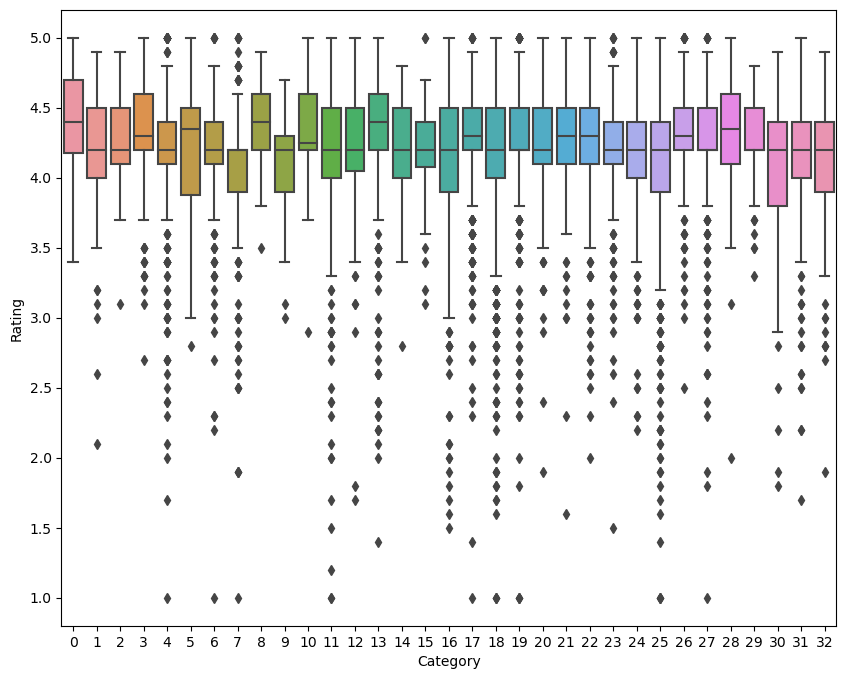

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Category', y='Rating', data=data)

# Which genre has the best ratings?

In [79]:
# So, we saw in the above boxplot that the index 0 of genre has a better rating. to find the genre-
for i, j in dictionary.items():
    if j==0:
        print('The genre which has the best ratings:', i)

The genre which has the best ratings: ART_AND_DESIGN


# 9.Data preprocessing

In [80]:
data1=pd.read_csv('googleplaystore.csv')

In [81]:
data.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,0,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,0,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [82]:
data1.Installs.isnull().any()

False

In [83]:
data1.Installs=data1.Installs.replace('+','')
data1.Installs=data1.Installs.replace(',','')
data1.Installs
data1.Installs.dtype

dtype('int64')

In [84]:
data1.Installs.astype(int)

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10813        5000
10814         100
10815        1000
10816        1000
10817    10000000
Name: Installs, Length: 10818, dtype: int32

In [85]:
free=data1.Installs.loc[data1.Installs=='Free'].index
free

Int64Index([], dtype='int64')

In [86]:
null=data1.Installs.isnull().any()
null
null=data1.loc[data1.Installs.isnull()].index
null
data1=data1.dropna(subset=['Installs'], axis=0)
data1.Installs.isnull().any()

False

In [87]:
data1.Installs=data1.Installs.astype(int)

In [88]:
log_installs=np.log(data1.Installs+1)
log_installs

0         9.210440
1        13.122365
2        15.424949
3        17.727534
4        11.512935
           ...    
10813     8.517393
10814     4.615121
10815     6.908755
10816     6.908755
10817    16.118096
Name: Installs, Length: 10818, dtype: float64

In [89]:
log_installs.describe()

count    10818.000000
mean        11.261951
std          4.518426
min          0.000000
25%          8.517393
50%         11.512935
75%         15.424949
max         20.723266
Name: Installs, dtype: float64

In [90]:
data1.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [91]:
data1=data1.drop(columns=['App', 'Last Updated', 'Current Ver','Android Ver'], axis=1)
data1

,Unnamed: 0,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design
1,1,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play
2,2,ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design
3,3,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design
4,4,ART_AND_DESIGN,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10813,10836,FAMILY,4.5,38,53000,5000,Free,0,Everyone,Education
10814,10837,FAMILY,5.0,4,3600,100,Free,0,Everyone,Education
10815,10838,MEDICAL,4.2,3,9500,1000,Free,0,Everyone,Medical
10816,10839,BOOKS_AND_REFERENCE,4.5,114,0,1000,Free,0,Mature 17+,Books & Reference


In [92]:
data1.isnull().sum()

Unnamed: 0        0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [93]:
data1=data1.dropna(subset=['Type', 'Content Rating'], axis=0)
data1

,Unnamed: 0,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design
1,1,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play
2,2,ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design
3,3,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design
4,4,ART_AND_DESIGN,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10813,10836,FAMILY,4.5,38,53000,5000,Free,0,Everyone,Education
10814,10837,FAMILY,5.0,4,3600,100,Free,0,Everyone,Education
10815,10838,MEDICAL,4.2,3,9500,1000,Free,0,Everyone,Medical
10816,10839,BOOKS_AND_REFERENCE,4.5,114,0,1000,Free,0,Mature 17+,Books & Reference


In [94]:
mean_rating=data1.Rating.mean()
data1.Rating=data1.Rating.fillna(value=mean_rating)

In [95]:
data1.isnull().sum()

Unnamed: 0        0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

# DUMMY VARIABLE OPERATIONS

# CATEGORY VARIABLE

In [96]:
data1.head()
data1.Category

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10813                 FAMILY
10814                 FAMILY
10815                MEDICAL
10816    BOOKS_AND_REFERENCE
10817              LIFESTYLE
Name: Category, Length: 10818, dtype: object

In [97]:
app_category=data1.Category.unique()
app_category

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [98]:
app_category=data1.Category.unique()
app_category

dictionary={}
for i in range(0,len(app_category)):
    dictionary[app_category[i]]=i
    
dictionary

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FINANCE': 11,
 'FOOD_AND_DRINK': 12,
 'HEALTH_AND_FITNESS': 13,
 'HOUSE_AND_HOME': 14,
 'LIBRARIES_AND_DEMO': 15,
 'LIFESTYLE': 16,
 'GAME': 17,
 'FAMILY': 18,
 'MEDICAL': 19,
 'SOCIAL': 20,
 'SHOPPING': 21,
 'PHOTOGRAPHY': 22,
 'SPORTS': 23,
 'TRAVEL_AND_LOCAL': 24,
 'TOOLS': 25,
 'PERSONALIZATION': 26,
 'PRODUCTIVITY': 27,
 'PARENTING': 28,
 'WEATHER': 29,
 'VIDEO_PLAYERS': 30,
 'NEWS_AND_MAGAZINES': 31,
 'MAPS_AND_NAVIGATION': 32}

In [99]:
data1.Category= data1.Category.map(dictionary)
data1.Category

0         0
1         0
2         0
3         0
4         0
         ..
10813    18
10814    18
10815    19
10816     3
10817    16
Name: Category, Length: 10818, dtype: int64

In [100]:
# for checking if the mappping is correct or not
for i,j in dictionary.items():
        if j ==1:
            print(i)

AUTO_AND_VEHICLES


# GENRES

In [101]:
genres_value=data1.Genres.unique()

genres_value


gen_dictionary={}

for i in range(0,len(genres_value)):
    
    gen_dictionary[genres_value[i]]=i
    
gen_dictionary




{'Art & Design': 0,
 'Art & Design;Pretend Play': 1,
 'Art & Design;Creativity': 2,
 'Art & Design;Action & Adventure': 3,
 'Auto & Vehicles': 4,
 'Beauty': 5,
 'Books & Reference': 6,
 'Business': 7,
 'Comics': 8,
 'Comics;Creativity': 9,
 'Communication': 10,
 'Dating': 11,
 'Education;Education': 12,
 'Education': 13,
 'Education;Creativity': 14,
 'Education;Music & Video': 15,
 'Education;Action & Adventure': 16,
 'Education;Pretend Play': 17,
 'Education;Brain Games': 18,
 'Entertainment': 19,
 'Entertainment;Music & Video': 20,
 'Entertainment;Brain Games': 21,
 'Entertainment;Creativity': 22,
 'Events': 23,
 'Finance': 24,
 'Food & Drink': 25,
 'Health & Fitness': 26,
 'House & Home': 27,
 'Libraries & Demo': 28,
 'Lifestyle': 29,
 'Lifestyle;Pretend Play': 30,
 'Adventure;Action & Adventure': 31,
 'Arcade': 32,
 'Casual': 33,
 'Card': 34,
 'Casual;Pretend Play': 35,
 'Action': 36,
 'Strategy': 37,
 'Puzzle': 38,
 'Sports': 39,
 'Music': 40,
 'Word': 41,
 'Racing': 42,
 'Casual;

In [102]:
data1.Genres=data1.Genres.map(gen_dictionary)
data1.Genres

0         0
1         1
2         0
3         0
4         2
         ..
10813    13
10814    13
10815    85
10816     6
10817    29
Name: Genres, Length: 10818, dtype: int64

In [103]:
# for checking if the mappping is correct or not
for i,j in gen_dictionary.items():
        if j ==1:
            print(i)

Art & Design;Pretend Play


# Content Rating

In [104]:
rating_value=data1['Content Rating'].unique()
rating_dictionary={}
for i in range(0, len(rating_value)):
    rating_dictionary[rating_value[i]]=i
rating_dictionary

{'Everyone': 0,
 'Teen': 1,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Adults only 18+': 4,
 'Unrated': 5}

In [105]:
a=data1['Content Rating']
a

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10813      Everyone
10814      Everyone
10815      Everyone
10816    Mature 17+
10817      Everyone
Name: Content Rating, Length: 10818, dtype: object

In [106]:
a=a.map(rating_dictionary)

In [107]:
a

0        0
1        0
2        0
3        1
4        0
        ..
10813    0
10814    0
10815    0
10816    3
10817    0
Name: Content Rating, Length: 10818, dtype: int64

In [108]:
data1['Content Rating']=a
data1['Content Rating']

0        0
1        0
2        0
3        1
4        0
        ..
10813    0
10814    0
10815    0
10816    3
10817    0
Name: Content Rating, Length: 10818, dtype: int64

In [109]:
# for checking if the mappping is correct or not
for i,j in rating_dictionary.items():
        if j ==1:
            print(i)

Teen


In [110]:
data1.head(12)

,Unnamed: 0,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,0,4.1,159,19000,10000,Free,0,0,0
1,1,0,3.9,967,14000,500000,Free,0,0,1
2,2,0,4.7,87510,8700,5000000,Free,0,0,0
3,3,0,4.5,215644,25000,50000000,Free,0,1,0
4,4,0,4.3,967,2800,100000,Free,0,0,2
5,5,0,4.4,167,5600,50000,Free,0,0,0
6,6,0,3.8,178,19000,50000,Free,0,0,0
7,7,0,4.1,36815,29000,1000000,Free,0,0,0
8,8,0,4.4,13791,33000,1000000,Free,0,0,0
9,9,0,4.7,121,3100,10000,Free,0,0,2


In [111]:
data1= data1.drop(columns=['Unnamed: 0'])

In [112]:
data1.head(9)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000,10000,Free,0,0,0
1,0,3.9,967,14000,500000,Free,0,0,1
2,0,4.7,87510,8700,5000000,Free,0,0,0
3,0,4.5,215644,25000,50000000,Free,0,1,0
4,0,4.3,967,2800,100000,Free,0,0,2
5,0,4.4,167,5600,50000,Free,0,0,0
6,0,3.8,178,19000,50000,Free,0,0,0
7,0,4.1,36815,29000,1000000,Free,0,0,0
8,0,4.4,13791,33000,1000000,Free,0,0,0


In [113]:
data1.Size

0        19000
1        14000
2         8700
3        25000
4         2800
         ...  
10813    53000
10814     3600
10815     9500
10816        0
10817    19000
Name: Size, Length: 10818, dtype: int64

In [114]:
error_size=data1.loc[data1.Size=='8.5'].index
data1=data1.drop(error_size)

In [115]:
data1.loc[data1.Size=='8.5']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


In [116]:
data1.Size=data1.Size.astype(int)

In [117]:
data1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000,10000,Free,0,0,0
1,0,3.9,967,14000,500000,Free,0,0,1
2,0,4.7,87510,8700,5000000,Free,0,0,0
3,0,4.5,215644,25000,50000000,Free,0,1,0
4,0,4.3,967,2800,100000,Free,0,0,2


# Price

In [118]:
data1.Type.value_counts()

Free    10027
Paid      791
Name: Type, dtype: int64

In [119]:
data1.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [120]:
def type_encode(x):
    if x=='Free':
        return 0
    else:
        return 1

In [121]:
data1.Type=data1.Type.map(type_encode).astype(int)

In [122]:
data1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000,10000,0,0,0,0
1,0,3.9,967,14000,500000,0,0,0,1
2,0,4.7,87510,8700,5000000,0,0,0,0
3,0,4.5,215644,25000,50000000,0,0,1,0
4,0,4.3,967,2800,100000,0,0,0,2


In [123]:
data1.dtypes

Category            int64
Rating            float64
Reviews             int64
Size                int32
Installs            int32
Type                int32
Price               int64
Content Rating      int64
Genres              int64
dtype: object

# Price

In [124]:
data1.Price=data1.Price.replace('$','')

In [125]:
data1.Price=data1.Price.astype(float)

# Reviews

In [126]:
data1.Reviews=data1.Reviews.astype(int)

In [127]:
data1.head(12)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000,10000,0,0.0,0,0
1,0,3.9,967,14000,500000,0,0.0,0,1
2,0,4.7,87510,8700,5000000,0,0.0,0,0
3,0,4.5,215644,25000,50000000,0,0.0,1,0
4,0,4.3,967,2800,100000,0,0.0,0,2
5,0,4.4,167,5600,50000,0,0.0,0,0
6,0,3.8,178,19000,50000,0,0.0,0,0
7,0,4.1,36815,29000,1000000,0,0.0,0,0
8,0,4.4,13791,33000,1000000,0,0.0,0,0
9,0,4.7,121,3100,10000,0,0.0,0,2


In [128]:
data1.dtypes

Category            int64
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type                int32
Price             float64
Content Rating      int64
Genres              int64
dtype: object

In [129]:
data2=data1

In [130]:
data2 # cleaned data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000,10000,0,0.0,0,0
1,0,3.9,967,14000,500000,0,0.0,0,1
2,0,4.7,87510,8700,5000000,0,0.0,0,0
3,0,4.5,215644,25000,50000000,0,0.0,1,0
4,0,4.3,967,2800,100000,0,0.0,0,2
...,...,...,...,...,...,...,...,...,...
10813,18,4.5,38,53000,5000,0,0.0,0,13
10814,18,5.0,4,3600,100,0,0.0,0,13
10815,19,4.2,3,9500,1000,0,0.0,0,85
10816,3,4.5,114,0,1000,0,0.0,3,6
